In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.optimize as opt

# Matrix Multiplication Using np.dot(M1,M2)

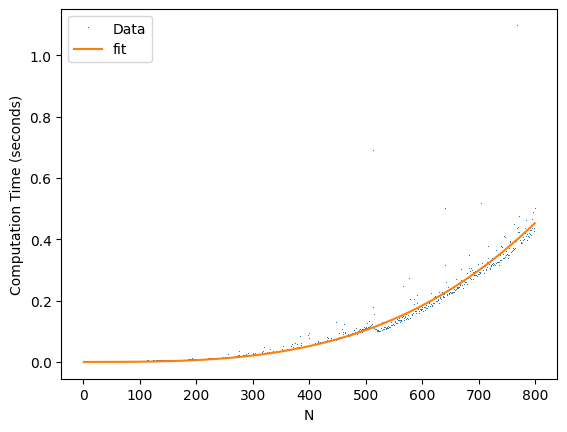

Predicted Fitting Exponent: 3.1396836825431413 ± 0.056703571084787
A: 3.485745170686612e-10


In [3]:
#Set the maximum matrix size
N = 800

#Empty list to store computation times
t_N = []

#Function to generate even and odd matrices
def generate_matrices(n):
    # Create an array with even numbers from 0 to 2*n^2-2
    E = np.arange(0, 2*n**2, 2).reshape(n, n) #makes an array ranging from 0 to 2n^2 in steps of 2, then reshapes into n rows on length n, making an nxn matrix.
    
    # Create an array with odd numbers from 1 to 2*n**2-1
    O = np.arange(1, 2*n**2 + 1, 2).reshape(n, n)
    
    return E, O

#Loop through matrix sizes from 1 to N
for n in range(1, N):
    E, O = generate_matrices(n)
    
    #Start time before performing matrix multiplication
    start_time = time.time()  
    
    #Perform matrix multiplication
    res = np.dot(E, O)  
    
    #End time after performing matrix multiplication
    end_time = time.time()

    #Calculate the time it took to perform the multiplication
    t_n = end_time - start_time
    
    #Append the calculation time to the list
    t_N.append(t_n)

#Convert the matrix sizes and times to numpy arrays
N_values = np.arange(1, N)
t_N = np.array(t_N)

#Define the fitting function (Power Law: t(N) = A * N^p)
def fit(N, p, A):
    return A * N**p

#Perform curve fitting
parameters, covariance = opt.curve_fit(fit, N_values, t_N, p0=[4, 10**-5], maxfev=10000)
perr = np.sqrt(np.diag(covariance))

#Generate fitted values for plotting
fitted_t_N = fit(N_values, *parameters)

#Plot the original data
plt.plot(N_values, t_N, ',', label='Data', markersize=2)

# Plot the fitted curve
plt.plot(N_values, fitted_t_N, label='fit', zorder=10)
plt.xlabel('N')
plt.ylabel('Computation Time (seconds)')
plt.legend()
plt.show()

#Print the fitting exponent and coefficient
print('Predicted Fitting Exponent: ' + str(parameters[0])+ ' ± ' + str(perr[0]))
print('A: ' + str(parameters[1]))


# Matrix Multiplication Using np.matmul(M1,M2)

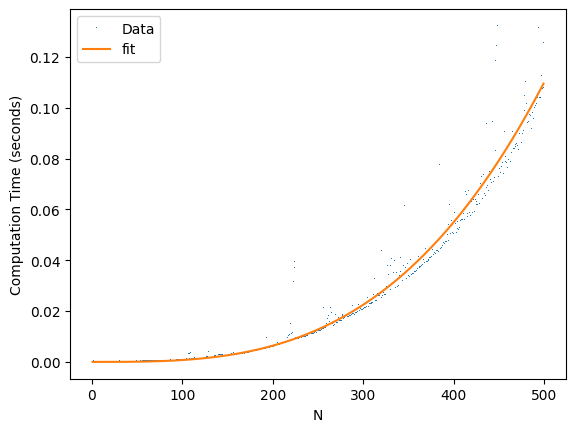

Predicted Fitting Exponent: 3.108425454198659 ± 0.04498319857147518
A: 4.4946866691855423e-10


In [4]:
#Set the maximum matrix size
N = 500

#Empty list to store computation times
t_N = []

# Function to generate even and odd matrices
def generate_matrices(n):
    #Create an array with even numbers from 0 to 2*n^2-2
    E = np.arange(0, 2*n**2, 2).reshape(n, n) #makes an array ranging from 0 to 2n^2 in steps of 2, then reshapes into n rows on length n, making an nxn matrix.
    
    #Create an array with odd numbers from 1 to 2*n**2-1
    O = np.arange(1, 2*n**2 + 1, 2).reshape(n, n)
    
    return E, O

#Loop through matrix sizes from 1 to N
for n in range(1, N):
    E, O = generate_matrices(n)
    
    #Start time before performing matrix multiplication
    start_time = time.time()  
    
    #Perform matrix multiplication
    res = np.matmul(E, O)  
    
    #End time after performing matrix multiplication
    end_time = time.time()

    #Calculate the time it took to perform the multiplication
    t_n = end_time - start_time
    
    #Append the calculation time to the list
    t_N.append(t_n)

#Convert the matrix sizes and times to numpy arrays
N_values = np.arange(1, N)
t_N = np.array(t_N)

#Define the fitting function (Power Law: t(N) = A * N^p)
def fit(N, p, A):
    return A * N**p

#Perform curve fitting
parameters, covariance = opt.curve_fit(fit, N_values, t_N, p0=[4, 10**-5], maxfev=10000)
perr = np.sqrt(np.diag(covariance))

#Generate fitted values for plotting
fitted_t_N = fit(N_values, *parameters)

#Plot the original data
plt.plot(N_values, t_N, ',', label='Data', markersize=2)

#Plot the fitted curve
plt.plot(N_values, fitted_t_N, label='fit', zorder=10)
plt.xlabel('N')
plt.ylabel('Computation Time (seconds)')
plt.legend()
plt.show()

#Print the fitting exponent and coefficient
print('Predicted Fitting Exponent: ' + str(parameters[0])+ ' ± ' + str(perr[0]))
print('A: ' + str(parameters[1]))


# Matrix Multiplication Using For Loops

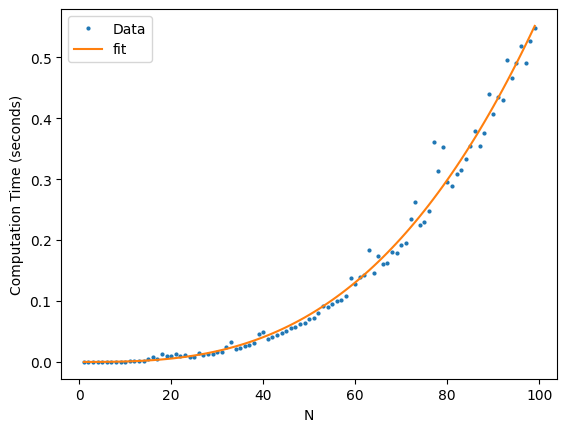

Predicted Fitting Exponent: 2.876179533466446 ± 0.05176758176420597
A: 1.0041049331872125e-06


In [5]:
#Set the maximum matrix size
N = 100

#Empty list to store computation times
t_N = []

# Function to generate even and odd matrices
def generate_matrices(n):
    #Create an array with even numbers from 0 to 2*n^2-2
    E = np.arange(0, 2*n**2, 2).reshape(n, n) #makes an array ranging from 0 to 2n^2 in steps of 2, then reshapes into n rows on length n, making an nxn matrix.
    
    #Create an array with odd numbers from 1 to 2*n**2-1
    O = np.arange(1, 2*n**2 + 1, 2).reshape(n, n)
    
    return E, O

#Loop through matrix sizes from 1 to N
for n in range(1, N):
    E, O = generate_matrices(n)
    
    #Start time before performing matrix multiplication
    start_time = time.time()  
    
    #Perform matrix multiplication
    res = [[0 for x in range(n)] for y in range(n)] 

    #explicit for loops
    for i in range(len(E)):
        for j in range(len(O[0])):
            for k in range(len(O)):

                # resulted matrix
                res[i][j] += E[i][k] * O[k][j]
    
    #End time after performing matrix multiplication
    end_time = time.time()

    #Calculate the time it took to perform the multiplication
    t_n = end_time - start_time
    
    #Append the calculation time to the list
    t_N.append(t_n)

#Convert the matrix sizes and times to numpy arrays
N_values = np.arange(1, N)
t_N = np.array(t_N)

#Define the fitting function (Power Law: t(N) = A * N^p)
def fit(N, p, A):
    return A * N**p

#Perform curve fitting
parameters, covariance = opt.curve_fit(fit, N_values, t_N, p0=[4, 10**-5], maxfev=10000)
perr = np.sqrt(np.diag(covariance))

#Generate fitted values for plotting
fitted_t_N = fit(N_values, *parameters)

#Plot the original data
plt.plot(N_values, t_N, 'o', label='Data', markersize=2)

#Plot the fitted curve
plt.plot(N_values, fitted_t_N, label='fit', zorder=10)
plt.xlabel('N')
plt.ylabel('Computation Time (seconds)')
plt.legend()
plt.show()

#Print the fitting exponent and coefficient
print('Predicted Fitting Exponent: ' + str(parameters[0])+ ' ± ' + str(perr[0]))
print('A: ' + str(parameters[1]))


# Matrix Multiplication using np.einsum (Einstein Notation)

Here, we finally test the time scaling for the Einstein summation method built into numpy. The first input (ik,kj->ij) is interpreted by Python to sum over the k index in the multiplication of matrix elements. Mathematically, this just means $\text{RESULT}_{ij} = \sum_k E_{ik}O_{kj}$

In this last cell, I also implement timeit to avoid problems with garbage collection. **ADD MORE ON GC**

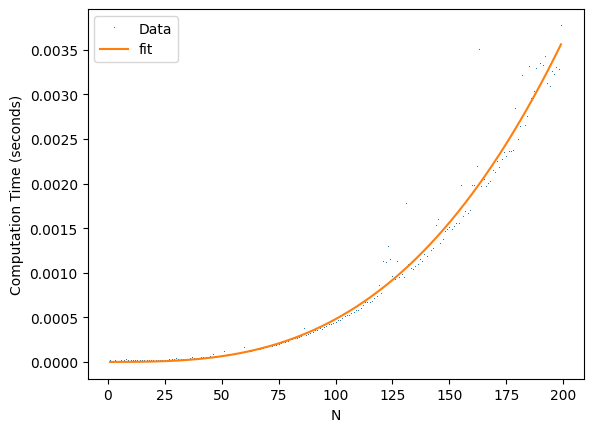

Predicted Fitting Exponent: 2.9132083213390487 ± 0.07488158210068356
A: 7.159329871961111e-10


In [15]:
import timeit

#Set the maximum matrix size
N = 200

#Empty list to store computation times
t_N = []

#Function to generate even and odd matrices
def generate_matrices(n):
    #Create an array with even numbers from 0 to 2*n^2-2
    E = np.arange(0, 2*n**2, 2).reshape(n, n) #makes an array ranging from 0 to 2n^2 in steps of 2, then reshapes into n rows on length n, making an nxn matrix.
    
    #Create an array with odd numbers from 1 to 2*n**2-1
    O = np.arange(1, 2*n**2 + 1, 2).reshape(n, n)
    
    return E, O

#Loop through matrix sizes from 1 to N
for n in range(1, N):
    E, O = generate_matrices(n)
    
    #Use timeit to time the matrix multiplication
    t_n = timeit.timeit(lambda: np.einsum('ik,kj->ij', E, O), number=50) / 50  # Averaging over 10 runs

    #Calculate the time it took to perform the multiplication
    #t_n = end_time - start_time
    
    #Append the calculation time to the list
    t_N.append(t_n)

#Convert the matrix sizes and times to numpy arrays
N_values = np.arange(1, N)
t_N = np.array(t_N)

#Define the fitting function (Power Law: t(N) = A * N^p)
def fit(N, p, A, b):
    return A * N**p+b

#Perform curve fitting
parameters, covariance = opt.curve_fit(fit, N_values, t_N, p0=[4, 10**-5, 0.3], maxfev=10000)
perr = np.sqrt(np.diag(covariance))

#Generate fitted values for plotting
fitted_t_N = fit(N_values, *parameters)

#Plot the original data
plt.plot(N_values, t_N, ',', label='Data', markersize=2)

#Plot the fitted curve
plt.plot(N_values, fitted_t_N, label='fit', zorder=10)
plt.xlabel('N')
plt.ylabel('Computation Time (seconds)')
plt.legend()
plt.show()

#Print the fitting exponent and coefficient
print('Predicted Fitting Exponent: ' + str(parameters[0])+ ' ± ' + str(perr[0]))
print('A: ' + str(parameters[1]))
